In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


11501568/11490434 [==============================] - 8s 1us/step


In [5]:
!pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 77.2 kB/s eta 0:00:00
     ------------------------------------ 161.3/161.3 kB 113.8 kB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 56.8 kB/s eta 0:00:00
     ------------------------------------ 965.4/965.4 kB 100.7 kB/s eta 0:00:00
     --------------------------------------- 55.4/55.4 kB 60.2 kB/s eta 0:00:00


8


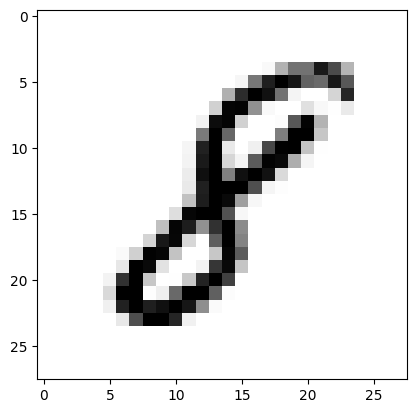

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [9]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4732)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               605824    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
__________________________________________________

In [10]:

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.2033 - accuracy: 0.9388
Epoch 2/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0832 - accuracy: 0.9742
Epoch 3/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0600 - accuracy: 0.9814
Epoch 4/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0458 - accuracy: 0.9858
Epoch 5/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0355 - accuracy: 0.9887
Epoch 6/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0298 - accuracy: 0.9901
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0275 - accuracy: 0.9907
Epoch 8/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0247 - accuracy: 0.9917
Epoch 9/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0206 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 37s 20m

In [11]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0688 - accuracy: 0.9836


[0.06875615566968918, 0.9836000204086304]

9
[[4.2392798e-17 3.2841056e-18 3.6451721e-14 1.3146293e-12 3.6865291e-05
  3.7633510e-10 1.1116823e-15 1.8185825e-09 1.0446622e-10 9.9996316e-01]]


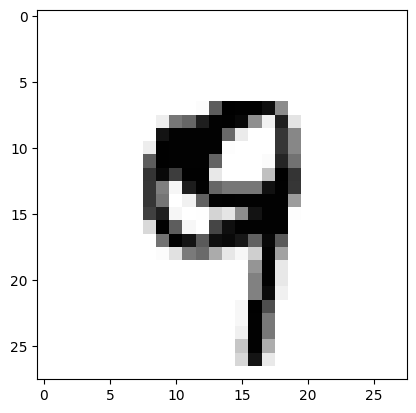

In [19]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())
print(pred)

In [18]:
prediction = model.predict(x_test[image_index])
print(prediction)

ValueError: in user code:

    C:\Users\Arhamsoft\.conda\envs\env\lib\site-packages\keras\engine\training.py:1586 predict_function  *
        return step_function(self, iterator)
    C:\Users\Arhamsoft\.conda\envs\env\lib\site-packages\keras\engine\training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Arhamsoft\.conda\envs\env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Arhamsoft\.conda\envs\env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Arhamsoft\.conda\envs\env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Arhamsoft\.conda\envs\env\lib\site-packages\keras\engine\training.py:1569 run_step  **
        outputs = model.predict_step(data)
    C:\Users\Arhamsoft\.conda\envs\env\lib\site-packages\keras\engine\training.py:1537 predict_step
        return self(x, training=False)
    C:\Users\Arhamsoft\.conda\envs\env\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\Arhamsoft\.conda\envs\env\lib\site-packages\keras\engine\input_spec.py:229 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (None, 28, 1)
